In [ ]:
# load data

# split data into training/test sets

# build the network architecture

# compile the network

# train network

In [6]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 239.4 MB 2.5 MB/s eta 0:00:01    |████████                        | 59.1 MB 884 kB/s eta 0:03:24     |████████████████▊               | 125.3 MB 582 kB/s eta 0:03:16     |████████████████████████████▌   | 213.5 MB 93 kB/s eta 0:04:39     |█████████████████████████████▋  | 221.3 MB 125 kB/s eta 0:02:24
     |████████████████████████████████| 57 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 414 kB 886 kB/s eta 0:00:01
     |████████████████████████████████| 133 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 275 kB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 339 kB/s eta 0:00:01
     |████████████████████████████████| 71 kB 905 kB/s eta 0:00:011
     |████████████████████████████████| 396 kB 1.7 MB/s eta 0:00:01
     |██████████████████████████████

In [33]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [34]:
DATASET_PATH = "data.json"

In [35]:
def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)

    # convert lists into numpy arrays
    X = np.array(data["mfcc"])
    Y = np.array(data["labels"])
    mapping = data["mapping"]  # Add this line to load the mapping

    print("Data Loaded!")
    return X, Y, mapping  # Return mapping as well

In [36]:
def plot_history(history):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="upper left")
    axs[0].set_title("Accuracy over Epochs")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="train loss")
    axs[1].plot(history.history["val_loss"], label="validation loss")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper left")
    axs[1].set_title("Loss over Epochs")

    plt.show()

Data Loaded!


/Users/andrewangulo/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 512)            │       865,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,018,378 (3.88 MB)

 Trainable params: 1,018,378 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1187 - loss: 33.4409 - val_accuracy: 0.1298 - val_loss: 3.5887
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1231 - loss: 7.2739 - val_accuracy: 0.1245 - val_loss: 3.5346
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1231 - loss: 4.7638 - val_accuracy: 0.1365 - val_loss: 3.5282
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1075 - loss: 4.1230 - val_accuracy: 0.1382 - val_loss: 3.5265
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1103 - loss: 3.8287 - val_accuracy: 0.1235 - val_loss: 3.5357
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1172 - loss: 3.7135 - val_accuracy: 0.1222 - val_loss: 3.5394
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1151 - loss: 3.6542 - val_accuracy: 0.1302 - val_loss: 3.5147
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1255 - loss: 3.6295 - val_accuracy: 0

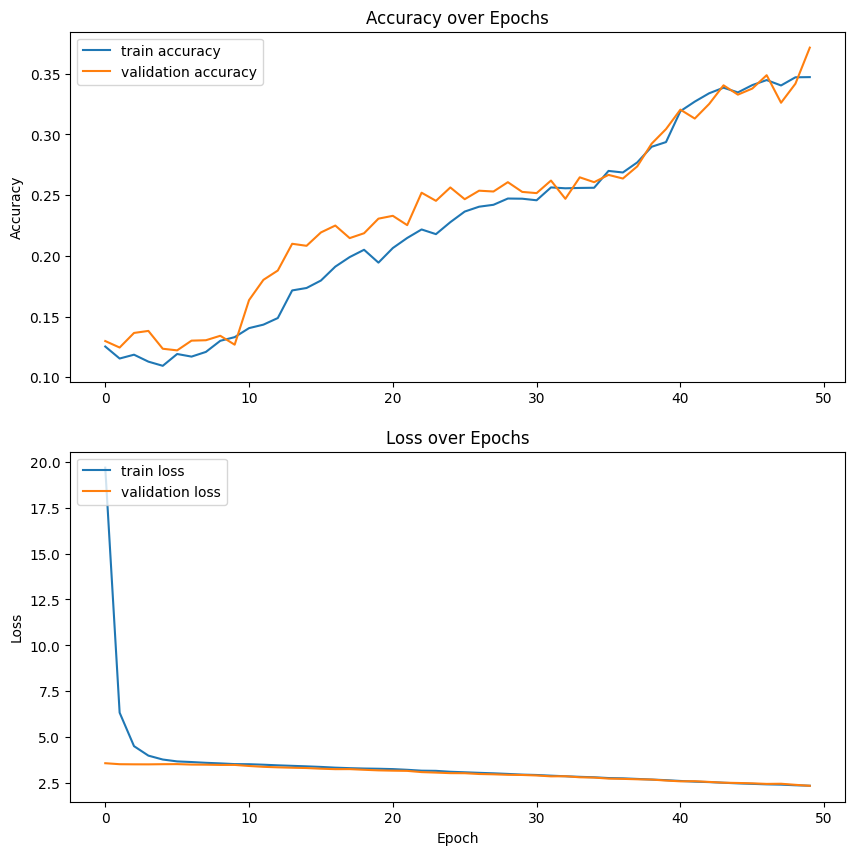

In [37]:
if __name__ == "__main__":

    # load data
    inputs, targets, mapping= load_data("data.json")  # Make sure DATASET_PATH is defined or replace it with the actual path
    
    # split data
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, 
                                                                              targets, 
                                                                              test_size=0.3)

    # model architecture
    model = keras.Sequential([
        # input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

        # 1st hidden layer
        keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 2nd hidden layer
        keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),


        # 3rd hidden layer
        keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 4th hidden layer
        keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),


        # output layer
        keras.layers.Dense(10, activation="softmax")  # Corrected typo here
    ])
    
    # compile the model
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    # summary of the model
    model.summary()

    # training
    history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), epochs=50, batch_size=32)

    # plot accuracy and error over the epochs
    plot_history(history)

In [39]:
# Save the trained model
model.save("genre_classification_model.keras")

# Save the label mapping
with open('label_mapping.json', 'w') as f:
    json.dump(mapping, f)